## Setup dependencies

In [ ]:
%pip install -r requirements.txt
#pip install tensorflow opencv-python matplotlib

In [91]:
import tensorflow as tf
import os
import numpy as np
import cv2 
import imghdr 
import matplotlib.pyplot as plt

### Remove bad images

In [3]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] #allowed extensions

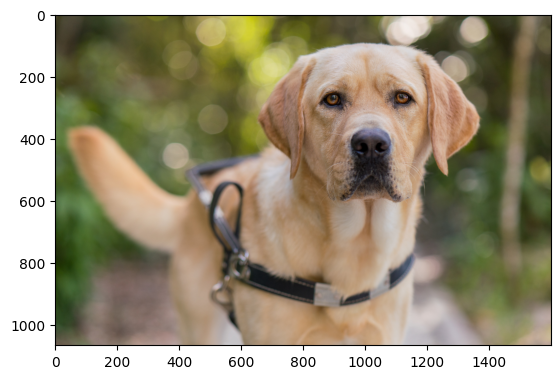

In [6]:
#visualise image
ig = cv2.imread(os.path.join(data_dir,'dogs', '04-21-2022_SGD7186-X3.jpg'))
plt.imshow(cv2.cvtColor(ig,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#remove files not images (if cv2 fails to read images or images not in th image extension list)
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) # convert image to image format
            tip = imghdr.what(image_path) # reads file extension
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))           

## Load Data

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 195 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [22]:
batch[0][1].shape #each image shape

(256, 256, 3)

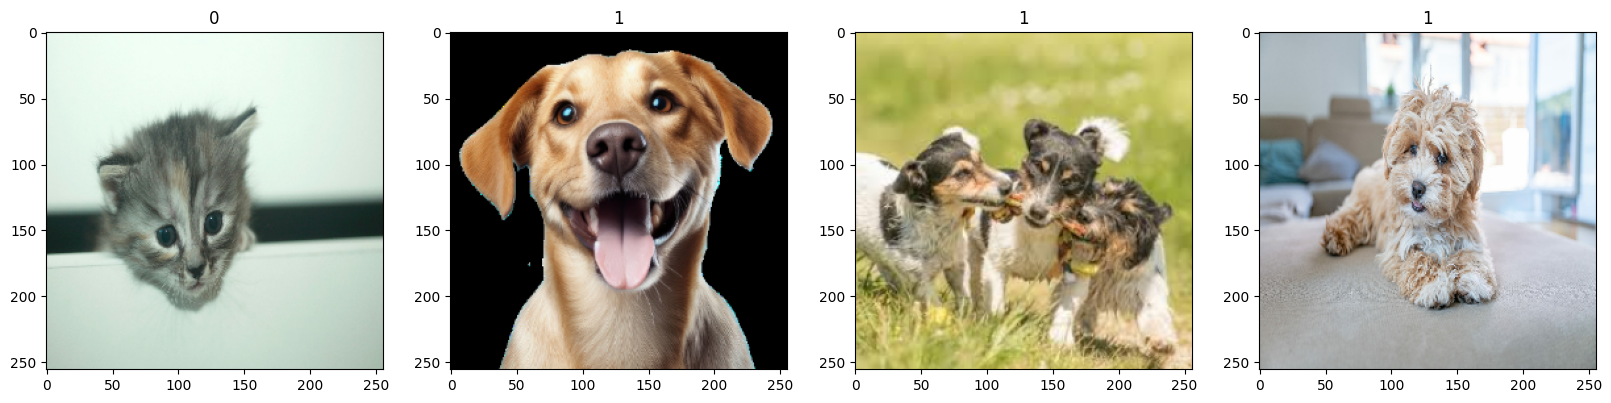

In [50]:
# visualize first 4 images in a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# label 0 = cat
# label 1 = dog

## Preprocess Data

In [51]:
#Scale Data (0-1)
data = data.map(lambda x, y: (x/255, y))

In [52]:
scaled_iterator = data.as_numpy_iterator()

In [64]:
batch = scaled_iterator.next()

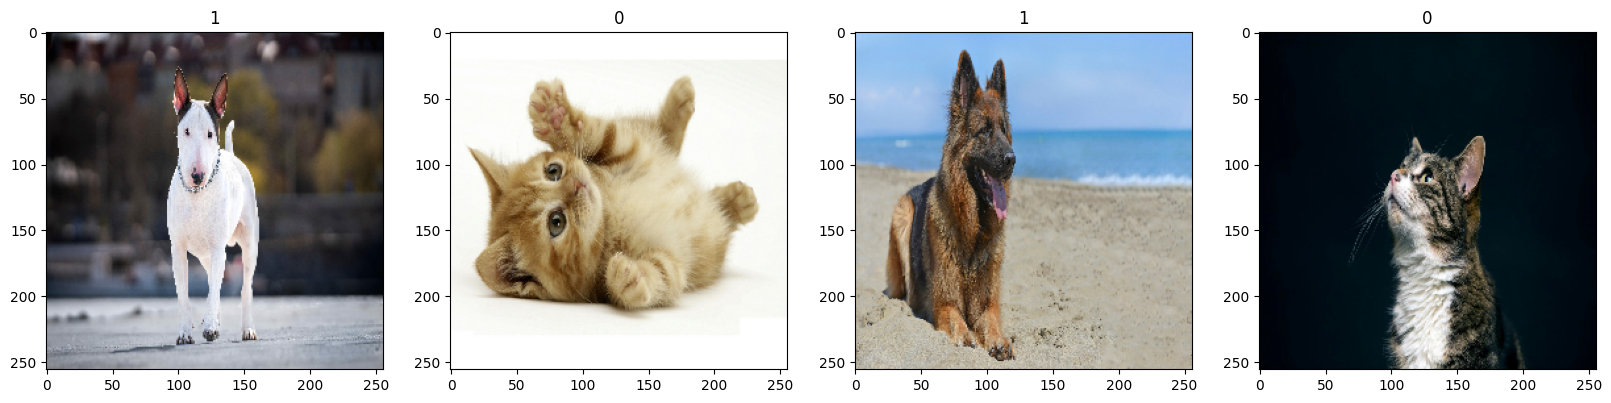

In [65]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split data into train, validation and test

In [ ]:
#train val test split
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)


In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Learning Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [72]:
model = Sequential()

In [ ]:
#Model architechture

#Convolution and MaxPooling layers for feature extraction
model.add(Conv2D(16, (3,3), 1, activation='relu')) # Convolution layer with activation=relu
model.add(MaxPooling2D()) # MaxPooling layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten
model.add(Flatten()) # Flatten the feature map to be passed as input to fully connected layers

#Fully Connected layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Model compile
model.compile(optimizer= 'adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

## Train the model

In [ ]:
#save logs
logdir = "logs" 

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 850ms/step - accuracy: 0.5156 - loss: 1.3472 - val_accuracy: 0.5000 - val_loss: 0.7509
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 947ms/step - accuracy: 0.4437 - loss: 0.7668 - val_accuracy: 0.6875 - val_loss: 0.6377
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 984ms/step - accuracy: 0.6510 - loss: 0.6475 - val_accuracy: 0.6406 - val_loss: 0.6187
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 971ms/step - accuracy: 0.6438 - loss: 0.6302 - val_accuracy: 0.5938 - val_loss: 0.6412
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6094 - loss: 0.6216 - val_accuracy: 0.6094 - val_loss: 0.6084
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 998ms/step - accuracy: 0.6031 - loss: 0.6158 - val_accuracy: 0.5781 - val_loss: 0.6079
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 893ms/step - accuracy: 0.6500 - loss: 0.5841 - val_accuracy: 0.7656 - val_loss: 0.5496
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6958 - loss: 0.5286 - val_accuracy: 0.8594 - val_loss: 0.440

## Plot Performance

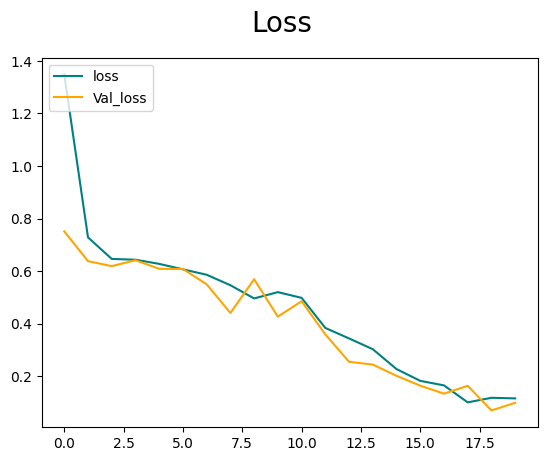

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

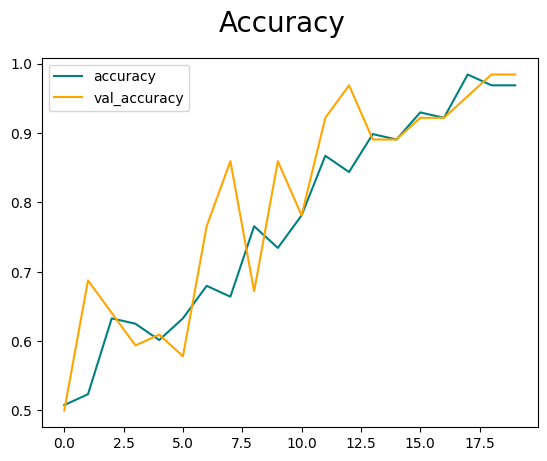

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

## Evaluate Performance

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [96]:
precision = Precision()
recall = Recall()
binaccuracy = BinaryAccuracy()

In [97]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    binaccuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [98]:
print(f'Precison: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Binary Accuracy: {binaccuracy.result().numpy()}')

Precison: 1.0, Recall: 1.0, Binary Accuracy: 1.0


## Test

In [99]:
import cv2

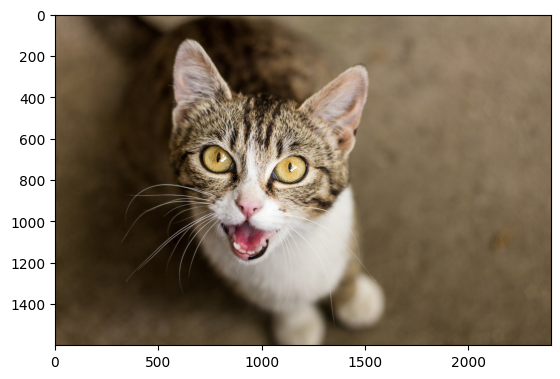

In [100]:
img = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

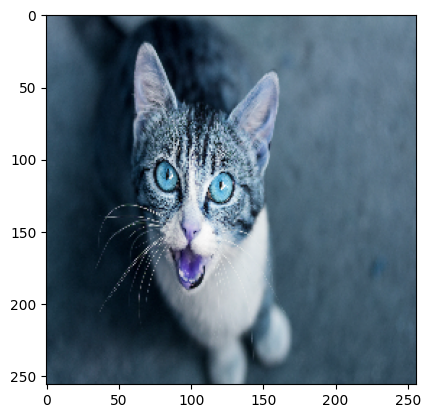

In [101]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
#Our neural net accepts us to pass a batch of images, not a single image. so, we have to expand dimensions.
print(resize.shape)
print(np.expand_dims(resize, 0).shape) #what axis we have to apply our extra dim here it is 0 

(256, 256, 3)
(1, 256, 256, 3)


In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # scale data by dividing with max value which is 255 (0-255 pixel values range)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.02383065]], dtype=float32)

In [104]:
if yhat >0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


## Save Model

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('models', 'catdogmodel.h5'))

In [ ]:
#new_model = load_model(os.path.join('models', 'catdogmodel.h5'))

In [ ]:
#yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# if yhat_new >0.5:
#     print(f'Predicted class is dog')
# else:
#     print(f'Predicted class is cat')

Predicted class is cat
